# Principal Component Analysis
PCA using the PCA implementaiton in `scikit-learn`

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## Top Trumps
`HarryPotterTT.csv` contains data on Top Trumps cards.  
There are 22 examples described by 5 features.

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
TT_df = pd.read_csv('HarryPotterTT.csv')
TT_df

,Name,Magic,Cunning,Courage,Wisdom,Temper
0,'Harry Potter',62,21,42,26,7
1,'Hermione Granger',60,16,40,73,2
2,'Ron Weasley',45,14,40,22,4
3,'Prof. Dumbledore',105,24,39,82,0
4,'Prof. Snape',85,24,19,71,7
5,'Prof. McGonagail',95,19,29,76,5
6,'Prof. Moody',82,20,35,69,5
7,'Rubeus Hagrid',12,11,30,8,7
8,'Fred Weasley',87,13,30,22,4
9,'George Weasley',87,13,30,22,4


Extract the data into a numpy array X.  
And scale the data.

In [3]:
y = TT_df.pop('Name').values
X = TT_df.values
X_scal = StandardScaler().fit_transform(X)
X.shape

(22, 5)

Apply PCA.

In [4]:
pcaHP = PCA(n_components=4)
X_r = pcaHP.fit(X_scal).transform(X_scal)
pcaHP.explained_variance_ratio_

array([0.48877025, 0.31551511, 0.10842469, 0.0501518 ])

There are five features being projected onto 4 PCs so the projection matrix is 4 x 5.

In [5]:
pcaHP.components_

array([[ 0.57407296,  0.40754714,  0.3846298 ,  0.57788956, -0.14983036],
       [ 0.10834723,  0.52231617, -0.44046049,  0.0043925 ,  0.72209553],
       [-0.27762934,  0.33155304,  0.76359223, -0.39624817,  0.27001634],
       [ 0.63573329, -0.55900795,  0.19114024, -0.25378831,  0.42709507]])

(0.0, 0.8)

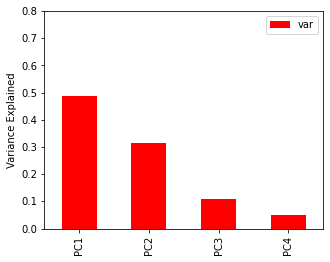

In [6]:
df = pd.DataFrame(pcaHP.explained_variance_ratio_, 
                  index=['PC1','PC2','PC3','PC4'],columns =['var'])

pl = df.plot.bar(color='red',figsize=(5,4))
pl.set_ylabel("Variance Explained")
pl.set_ylim([0,0.8])

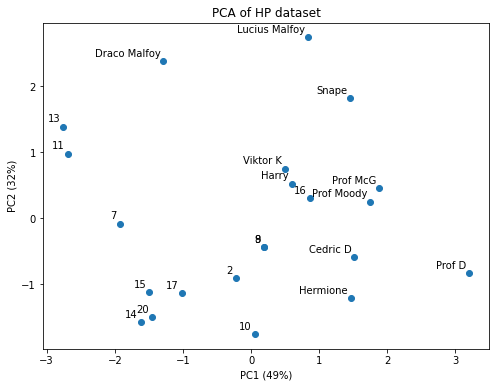

In [7]:
plt.figure(figsize=(8,6))
lw = 2
labels = list(range(len (y)))
labels[0]='Harry'
labels[1]='Hermione'
labels[3]='Prof D'
labels[5]='Prof McG'
labels[6]='Prof Moody'
labels[18]='Cedric D'
labels[19]='Viktor K'
labels[21]='Lucius Malfoy'
labels[4]='Snape'
labels[12]='Draco Malfoy'

plt.scatter(X_r[:, 0], X_r[:, 1])

for label, xi, yi in zip(labels, X_r[:, 0], X_r[:, 1]):
    plt.annotate(
        label,
        xy=(xi, yi), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')

plt.xlabel('PC1 (49%)')
plt.ylabel('PC2 (32%)')
plt.title('PCA of HP dataset')

plt.show()

## Comment
 - This plot shows the data projected onto the first 2 PCs.  
 - These PCs account for 81% of the variance in the data. 
 - It might be argued that the first PC captures *competence* and the second represents *malevolence*. 
